In [81]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# 実験データの作成  
サンプリング周波数3000Hz  
三秒間の基本周波数100Hzの矩形波を使用  
400Hz～1000Hzの周波数成分をカット  



In [82]:
ft=    100      #    基本周波数
fs =   3000      # サンプリング周波数
time =     3     # 時間
N = fs * time;             # サンプル数

# カットオフ周波数の定義
fc = [400, 1000]

dt = 1/fs;             # Sampling period       

t = np.linspace(0, N*dt, N)
before_sg = signal.square(2*np.pi*ft*t, duty=0.5)   #基本周波数１００で奇数ごとにスペクトルがたつ

# フィルタ処理
４次の[バターワースフィルタ](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html)を使用
パラメータやフィルタの種類が複数あるためいろいろなフィルタの特性を見るといい

In [83]:
#バターワースフィルタ（バンドパス）
class butter:
    def __init__(self, lowcut, highcut, fs, order=5, filter_type='bandpass'):
        nyq = 0.5 * fs    #ナイキスト周波数

        #　周波数の正規化
        self.lowcut = lowcut/nyq
        self.highcut = highcut/nyq

        # フィルタのパラメータの取得
        self.b,self.a = signal.butter(order,[self.lowcut,self.highcut],filter_type)

    def fit(self, data, axis=-1):
        self.data = data
        return signal.lfilter(self.b,self.a,data,axis=-1)

#　フィルタの作成
filter = butter(fc[0], fc[1], fs)

#　フィルタリング処理
after_sg = filter.fit(before_sg)


# 周波数解析
freq = np.linspace(0,fs,N)
before_FFT = np.abs(np.fft.fft(before_sg))
after_FFT = np.abs(np.fft.fft(after_sg))

# グラフの描画

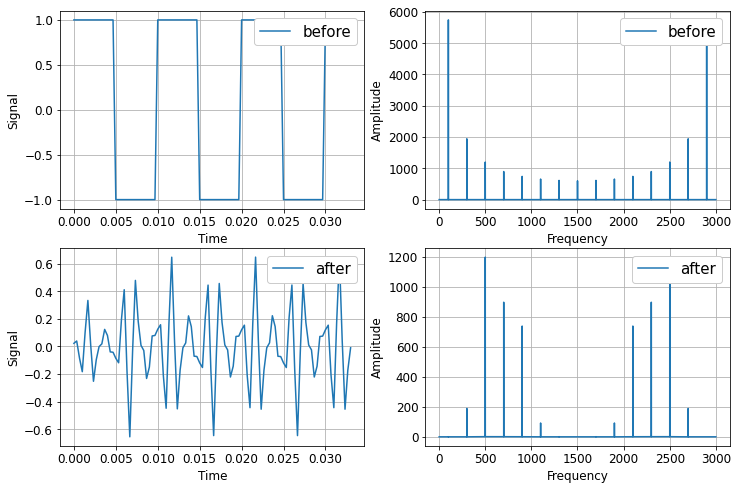

In [84]:
fig = plt.figure(figsize=(12.0, 8.0))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

# 時間信号（元）
plt.subplot(2,2,1)
plt.plot(t[0:100], before_sg[0:100], label='before')
plt.xlabel("Time", fontsize=12)
plt.ylabel("Signal", fontsize=12)
plt.grid()
leg = plt.legend(loc=1, fontsize=15)
leg.get_frame().set_alpha(1)

# 周波数信号(元)
plt.subplot(2,2,2)
plt.plot(freq, before_FFT, label='before')
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.grid()
leg = plt.legend(loc=1, fontsize=15)
leg.get_frame().set_alpha(1)

# 時間信号(処理後)
plt.subplot(2,2,3)
plt.plot(t[0:100], after_sg[0:100], label='after')
plt.xlabel("Time", fontsize=12)
plt.ylabel("Signal", fontsize=12)
plt.grid()
leg = plt.legend(loc=1, fontsize=15)
leg.get_frame().set_alpha(1)


# 周波数信号(処理後)
plt.subplot(2,2,4)
plt.plot(freq, after_FFT, label='after')
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.grid()
leg = plt.legend(loc=1, fontsize=15)
leg.get_frame().set_alpha(1)


# 参考いろいろなフィルタ

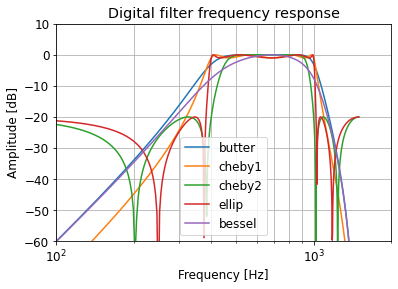

In [85]:

bpfc1 = [400, 1000]
order = 4

fig, ax1 = plt.subplots()

plt.grid(which="both")

# Butterworth : ‘butter’

# Chebyshev I : ‘cheby1’

# Chebyshev II : ‘cheby2’

# Cauer/elliptic: ‘ellip’

# Bessel/Thomson: ‘bessel’
filters = ['butter', 'cheby1', 'cheby2', 'ellip', 'bessel']
for fi in filters:
	fs =3000
	b, a = signal.iirfilter(order, bpfc1,btype='bandpass',rs = 20,rp = 1, analog=False, ftype=fi,output='ba',fs=fs)

	fs, h = signal.freqz(b,a,fs=fs)
	ax1.set_title('Digital filter frequency response')
	ax1.semilogx(fs, 20 * np.log10(abs(h)), label=fi)

	ax1.axis((100 ,2000, -60, 10))
	ax1.set_ylabel('Amplitude [dB]')
	ax1.set_xlabel('Frequency [Hz]')

ax1.legend()
plt.show()